In [2]:
#%%
#python 3.8
import datetime
from astropy.units import equivalencies
import numpy as np
try:
    from galpy.util import coords
except:
    from galpy.util import bovy_coords as coords
import gala.coordinates as gcoords
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib
import pickle
import pandas as pd
from mpl_toolkits import mplot3d
import os
import glob
from scipy.signal import find_peaks

import struct

In [3]:
def loader_all_snaps(filename):
    catd,cats, t=loader(filename+str(0))
    x=cats['x']
    y=cats['y']
    z=cats['z']
    vx=cats['vx']
    vy=cats['vy']
    vz=cats['vz']
    mass=cats['mass']
    idd=cats['ID']
    xd=catd['x']
    yd=catd['y']
    zd=catd['z']
    vxd=catd['vx']
    vyd=catd['vy']
    vzd=catd['vz']
    massd=catd['mass']
    iddd=catd['ID']
    #timefw=t*9.778145/1000.
    for i in range(1,8):
        #print('Loading '+times[i])
        catd,cats,t=loader(filename+str(i))
        try:
            x=np.hstack((x,cats['x']))
            y=np.hstack((y,cats['y']))
            z=np.hstack((z,cats['z']))
            vx=np.hstack((vx,cats['vx']))
            vy=np.hstack((vy,cats['vy']))
            vz=np.hstack((vz,cats['vz']))
            idd=np.hstack((idd,cats['ID']))
            mass=np.hstack((mass,cats['mass']))
        except:
            print(filename+str(j),'has no star particles')
        try:
            xd=np.hstack((xd,catd['x']))
            yd=np.hstack((yd,catd['y']))
            zd=np.hstack((zd,catd['z']))
            vxd=np.hstack((vxd,catd['vx']))
            vyd=np.hstack((vyd,catd['vy']))
            vzd=np.hstack((vzd,catd['vz']))
            iddd=np.hstack((iddd,catd['ID']))
            massd=np.hstack((massd,catd['mass']))
        except:
            print(filename+str(j),'has no dark particles')
    #print(np.shape(xd))
    catd = {'mass':np.zeros(len(xd)), 'x':np.zeros(len(xd)), 'y':np.zeros(len(xd)),'z':np.zeros(len(xd)),'vx':np.zeros(len(xd)),'vy':np.zeros(len(xd)),'vz':np.zeros(len(xd)),'ID':np.zeros(len(xd))}
    cats = {'mass':np.zeros(len(x)), 'x':np.zeros(len(x)), 'y':np.zeros(len(x)),'z':np.zeros(len(x)),'vx':np.zeros(len(x)),'vy':np.zeros(len(x)),'vz':np.zeros(len(x)), 'ID':np.zeros(len(x))}
    catd['mass'] = massd
    catd['x'] = xd
    catd['y'] = yd
    catd['z'] = zd
    catd['vx'] = vxd
    catd['vy'] = vyd
    catd['vz'] = vzd
    catd['ID'] = iddd
    cats['mass'] = mass
    cats['x'] = x
    cats['y'] = y
    cats['z'] = z
    cats['vx'] = vx
    cats['vy'] = vy
    cats['vz'] = vz
    cats['ID'] = idd
    return catd, cats, t



In [4]:
def loader(filename):
    ffile = open(filename, 'rb')
    t,n,ndim,ng,nd,ns,on=struct.unpack("<diiiiii",ffile.read(32))
    print(t,n,ndim,ng,nd,ns,on)
    catd = {'mass':np.zeros(nd), 'x':np.zeros(nd), 'y':np.zeros(nd),'z':np.zeros(nd),'vx':np.zeros(nd),'vy':np.zeros(nd),'vz':np.zeros(nd),'ID':np.zeros(nd)}
    cats = {'mass':np.zeros(ns), 'x':np.zeros(ns), 'y':np.zeros(ns),'z':np.zeros(ns),'vx':np.zeros(ns),'vy':np.zeros(ns),'vz':np.zeros(ns),'metals':np.zeros(ns), 'tform':np.zeros(ns), 'ID':np.zeros(ns)}
    for i in range(nd):
        mass, x, y, z, vx, vy, vz, IDs = struct.unpack("<fffffffQ", ffile.read(36))
        catd['mass'][i] = mass*2.324876e9
        catd['x'][i] = x
        catd['y'][i] = y
        catd['z'][i] = z
        catd['vx'][i] = vx*100.
        catd['vy'][i] = vy*100.
        catd['vz'][i] = vz*100.
        catd['ID'][i] = IDs
    for i in range(ns):
        mass, x, y, z, vx, vy, vz, metals, tform, IDs = struct.unpack("<fffffffffQ", ffile.read(44))
        cats['mass'][i] = mass*2.324876e9
        cats['x'][i] = x
        cats['y'][i] = y
        cats['z'][i] = z
        cats['vx'][i] = vx*100.
        cats['vy'][i] = vy*100.
        cats['vz'][i] = vz*100.
        cats['metals'][i] = metals
        cats['tform'][i] = tform
        cats['ID'][i] = IDs
    return catd, cats, t

In [5]:
def gettimes():
    path_01 ='/work2/07428/binod/stampede2/LRBB-IoMW/' 
    times = sorted(glob.glob(path_01+'snapshot*-0')) #remember! glob is not sorted!
    #print(times)
    for ii,t in enumerate(times):
        times[ii] = t.split('/')[-1]
    return times 
        

In [6]:
path = '/work2/07428/binod/stampede2/LRBB-IoMW/'
times = gettimes()
snapshot=500
snapshot_name = times[snapshot] #indexing starts at zero - 702 gives us 703rd item
print('we have selected', snapshot_name)
print('this name is a', type(snapshot_name)) #let's also print out the data type of snapshot_name

we have selected snapshot__00501.0006-0
this name is a <class 'str'>


In [7]:
print(times[0:10])
print(times[-10:])

['snapshot__00001.0010-0', 'snapshot__00002.0000-0', 'snapshot__00003.0010-0', 'snapshot__00004.0009-0', 'snapshot__00005.0008-0', 'snapshot__00006.0007-0', 'snapshot__00007.0007-0', 'snapshot__00008.0006-0', 'snapshot__00009.0000-0', 'snapshot__00010.0004-0']
['snapshot__00501.0006-0', 'snapshot__00502.0006-0', 'snapshot__00503.0006-0', 'snapshot__00504.0007-0', 'snapshot__00505.0007-0', 'snapshot__00506.0007-0', 'snapshot__00507.0008-0', 'snapshot__00508.0008-0', 'snapshot__00509.0008-0', 'snapshot__00510.0009-0']


In [8]:
a=['snapshot__00001.0010-0', 'snapshot__00002.0000-0', 'snapshot__00003.0010-0', 'snapshot__00004.0009-0', 'snapshot__00005.0008-0', 'snapshot__00006.0007-0', 'snapshot__00007.0007-0', 'snapshot__00008.0006-0', 'snapshot__00009.0000-0', 'snapshot__00010.0004-0']
b=['snapshot__00001.0010-0', 'snapshot__00002.0000-0', 'snapshot__00003.0010-0', 'snapshot__00004.0009-0', 'snapshot__00005.0008-0', 'snapshot__00006.0007-0', 'snapshot__00007.0007-0', 'snapshot__00008.0006-0', 'snapshot__00009.0000-0', 'snapshot__00010.0004-0']

if (a==b):
    print("ture")

ture


In [9]:
filename=path+times[snapshot][:-1]

In [10]:
d, s, t=loader_all_snaps(filename)

501.0005798339844 1533492 3 0 1494992 38500 2
501.0005798339844 1326252 3 0 636902 689350 2
501.0005798339844 1093101 3 0 175521 917580 2
501.0005798339844 930123 3 0 38678 891445 2
501.0005798339844 1076360 3 0 75475 1000885 2
501.0005798339844 971002 3 0 10822 960180 2
501.0005798339844 1099477 3 0 75054 1024423 2
501.0005798339844 1304002 3 0 829962 474040 2


In [11]:
xd=d["x"]
yd=d["y"]
zd=d["z"]

vxd=d["vx"]
vyd=d["vy"]
vzd=d["vz"]

massd=d["mass"]

x=s["x"]
y=s["y"]
z=s["z"]

vx=s["vx"]
vy=s["vy"]
vz=s["vz"]

mass=s["mass"]
print("x Range of dark matter particles",np.min(xd),np.max(xd))
print("Total Dark matter particles is",len(xd))

print("x Range of star particles",np.min(x),np.max(x))
print("Total star particles is",len(x))
massd=d["mass"]
print(np.min(massd),np.max(massd))

x Range of dark matter particles -910.6746215820312 868.1818237304688
Total Dark matter particles is 3337406
x Range of star particles -853.73876953125 769.748291015625
Total star particles is 5996403
348275.7076264825 348275.7076264825


[ 4496.57345969 13416.4859737 ]


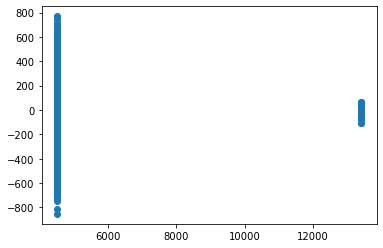

In [15]:
print(np.unique(mass))
plt.scatter(mass,x)

# Distribution of DM

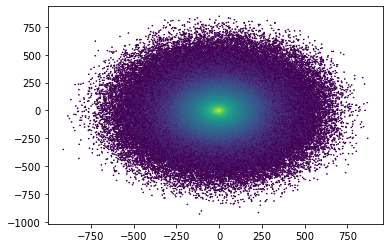

In [14]:
plt.hexbin(xd,yd,gridsize=400,mincnt=1,bins="log")

# Distribution of stars

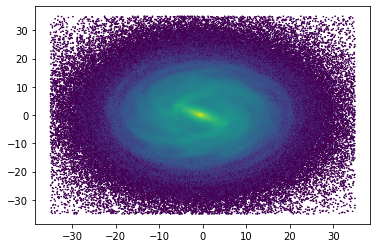

In [21]:
plt.hexbin(x,y,gridsize=400,extent=((-35,35,-35,35)),mincnt=1,bins="log")

# Getting rotation curve using regular method

In [25]:

#getting r for snaparr and snaparr_dark
#snaparr_r,snaparr_phi,snaparr_zz=coords.rect_to_cyl(x,y,z)
#snaparr_dark_r,snaparr_dark_phi,snaparr_dark_zz=coords.rect_to_cyl(xd,yd,zd)

r_sph_stars=np.sqrt(x**2+y**2+z**2)
r_sph_dark=np.sqrt(xd**2+yd**2+zd**2)

rmin=0.01
rmax=30
step_count=250
savepath="./"

radii = np.empty(step_count)
star_enc = np.empty(step_count)
total_enc = np.empty(step_count)
dark_enc = np.empty(step_count)


for ii,radius in enumerate(np.linspace(rmin, rmax, step_count)):
    #disk_annulus = (snaparr['r'] < radius) & (snaparr['mass']<massflaglo)
    #bulge_annulus = (snaparr['r'] < radius) & (snaparr['mass']>massflaglo) & (snaparr['mass']<massflaghi)
    #dark_annulus = (snaparr_dark['r'] < radius) & (snaparr_dark['mass']<massflaghi)

    star_annulus = np.where(r_sph_stars <= radius)
    dark_annulus = np.where(r_sph_dark <= radius)

    #mass enclosed
  
    star_enc[ii] = np.sum(mass[star_annulus])
    dark_enc[ii] = np.sum(massd[dark_annulus])
    total_enc[ii] = star_enc[ii]+dark_enc[ii]

    #radius
    radii[ii] = radius

G = 4.3 * 10**(-6) #kpc m_odot (km/s)^2

star_vc = np.sqrt((G * star_enc)/radii)
dark_vc = np.sqrt((G * dark_enc)/radii)
total_vc = np.sqrt((G * total_enc)/radii)

v_circ_df = pd.DataFrame(np.array([radii, star_vc, dark_vc, total_vc]).T, 
                    columns=['radius', 'star_vc', 'dark_vc', 'total_vc'])
#v_circ_df.to_csv(savepath+'downsampled_velocity_curve_timestep'+str(snapshot)+'.csv')

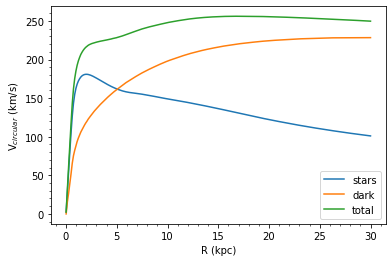

In [26]:
v_circ=v_circ_df
fig1=plt.figure()
ax1=fig1.add_subplot(111)
#ax1.plot(v_circ["radius"],v_circ["disk_vc"],label="disk")
#ax1.plot(v_circ["radius"],v_circ["bulge_vc"],label="bulge")
ax1.plot(v_circ["radius"],v_circ["star_vc"],label="stars")

ax1.plot(v_circ["radius"],v_circ["dark_vc"],label="dark")
ax1.plot(v_circ["radius"],v_circ["total_vc"],label="total")
ax1.legend()
ax1.set_xlabel("R (kpc)")
ax1.set_ylabel(r"V$_{circular}$ (km/s)")
ax1.minorticks_on()
#fig1.savefig("Rotation_Curves_downsampled_star_dark_total.jpg",dpi=200)

In [27]:
# Setting up agama

In [31]:
import agama
agama.setUnits(mass=1, length=1, velocity=1)
load = np.load
finder = agama.ActionFinder 
dm_mass   = massd  # mass needs to be in solar masses

halo_mass=mass

In [32]:
halo_phasespace   = np.vstack((x,y,z,vx,vy,vz)).T
dm_phasespace   = np.vstack((xd,yd,zd,vxd,vyd,vzd)).T


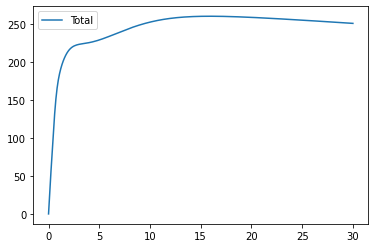

In [33]:
# create three components of a composite galaxy potential

dark = agama.Potential(type = "Multipole",particles=(dm_phasespace, dm_mass), symmetry='a', gridsizeR=20, lmax=2)

halo = agama.Potential(type = "Multipole",particles=(halo_phasespace, mass),symmetry='a',gridsizeR=20,lmax=2)    

potential = agama.Potential(dark,halo) #combining the potentials to get full potential

# choose the grid in radius to plot the profiles
r=np.linspace(0.0, 30.0, 250)
xyz=np.column_stack((r, r*0, r*0))
# circular velocity as a function of radius: total...
vcirc_total = np.sqrt(-r * potential.force(xyz)[:,0])

plt.plot(r, vcirc_total, label="Total")
plt.legend()
# ...and for each potential component separately

total_vc=vcirc_total
radii=r


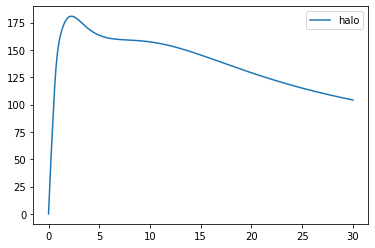

In [34]:
halo_vc=np.sqrt(-r * halo.force(xyz)[:,0])
plt.plot(r, halo_vc,label="halo")
plt.legend()

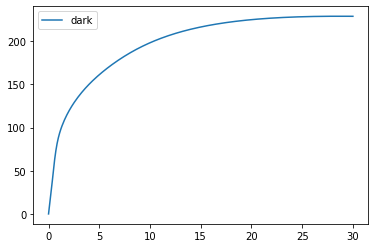

In [35]:
dark_vc=np.sqrt(-r * dark.force(xyz)[:,0])
plt.plot(r, dark_vc,label="dark")
plt.legend()

In [36]:
v_circ_df_agama = pd.DataFrame(np.array([radii, halo_vc, dark_vc, total_vc]).T, 
                            columns=['radius','halo_vc', 'dark_vc', 'total_vc'])

v_circ_df_agama.to_csv("velocity_curve_star_dm_total"+str(snapshot)+"_agama_low_res_sim.csv")

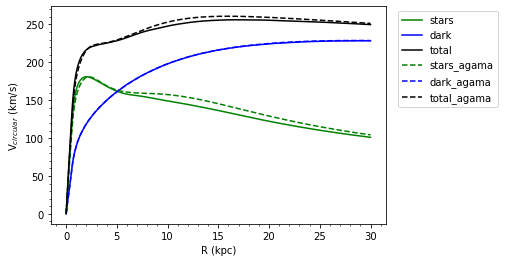

In [39]:
fig3=plt.figure()
ax1=fig3.add_subplot(111)

ax1.plot(v_circ["radius"],v_circ["star_vc"],label="stars",c="green")
ax1.plot(v_circ["radius"],v_circ["dark_vc"],label="dark",c="blue")
ax1.plot(v_circ["radius"],v_circ["total_vc"],label="total",c="black")

ax1.plot(v_circ_df_agama["radius"],v_circ_df_agama["halo_vc"],label="stars_agama",c="green",linestyle="dashed")
ax1.plot(v_circ_df_agama["radius"],v_circ_df_agama["dark_vc"],label="dark_agama",c="blue",linestyle="dashed")
ax1.plot(v_circ_df_agama["radius"],v_circ_df_agama["total_vc"],label="total_agama",c="black",linestyle="dashed")
ax1.legend(loc="upper right",bbox_to_anchor=(1.35, 1))
ax1.set_xlabel("R (kpc)")
ax1.set_ylabel(r"V$_{circular}$ (km/s)")
ax1.minorticks_on()
fig3.savefig("Rotation_Curves_low_res_sims_agama_comparison_dark_star_total.jpg",dpi=200,bbox_inches="tight")